<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 176.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 193.6 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 99.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 111.1 MB/s eta 0:00:00


In [3]:
!pip install seaborn

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [4]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-06-13 23:02:03--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  64.4MB/s    in 2.4s    

2025-06-13 23:02:05 (64.4 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ... JobSatPoints_6  \
0                                                NaN  ...            NaN   
1  Technical documentation;Blogs;Books;Written Tu...  ...            0.0   
2  Technical documentation;Blogs;Books;Written Tu...  ...            NaN   
3  Stack Overflow;How-to videos;Interactive tutorial  ...            NaN   
4  Technical documentation;Blogs;Written Tutorial...  ...            NaN   

  JobSatPoints_7 JobSatPoints_8 JobSatPoints_9 JobSatPoints_10  \
0            NaN            NaN            NaN             NaN   
1            0.0            0.0            0.0             0.0   
2            NaN            NaN            NaN             NaN   
3            NaN            NaN            NaN             NaN   
4            NaN            NaN            NaN             NaN   

  JobSatPoints_11           SurveyLength SurveyEase ConvertedCompYearly JobSat  
0             NaN                    NaN        NaN                 NaN    NaN  
1             0.0                    NaN        NaN                 NaN    NaN  
2             NaN  Appropriate in length       Easy                 NaN    NaN  
3             NaN               Too long       Easy                 NaN    NaN  
4             NaN              Too short       Easy                 NaN    NaN  

[5 rows x 114 columns]

### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



In [5]:
## Write your code here

# Drop missing or zero compensation values
df_comp = df['ConvertedCompYearly'].dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_comp, bins=50, color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Distribution of Yearly Compensation (ConvertedCompYearly)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



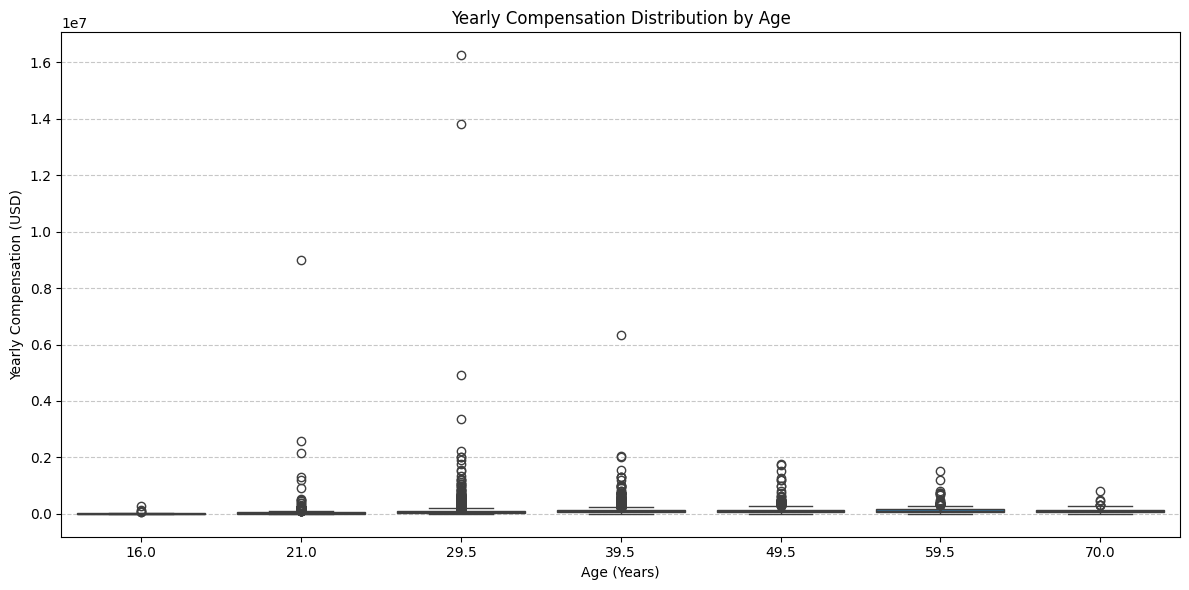

In [6]:
## Write your code here
import numpy as np
# Map Age categories to numeric midpoints
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': np.nan
}
df['Age_numeric'] = df['Age'].map(age_map)

# Clean data: keep rows with non-null Age_numeric and positive compensation
df_clean = df.dropna(subset=['Age_numeric', 'ConvertedCompYearly'])

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age_numeric', y='ConvertedCompYearly', data=df_clean)
plt.title('Yearly Compensation Distribution by Age')
plt.xlabel('Age (Years)')
plt.ylabel('Yearly Compensation (USD)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



In [7]:
## Write your code here
# Create the box plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age_numeric', y='ConvertedCompYearly', data=df_clean)
plt.title('Yearly Compensation Distribution by Age')
plt.xlabel('Age (Years)')
plt.ylabel('Yearly Compensation (USD)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


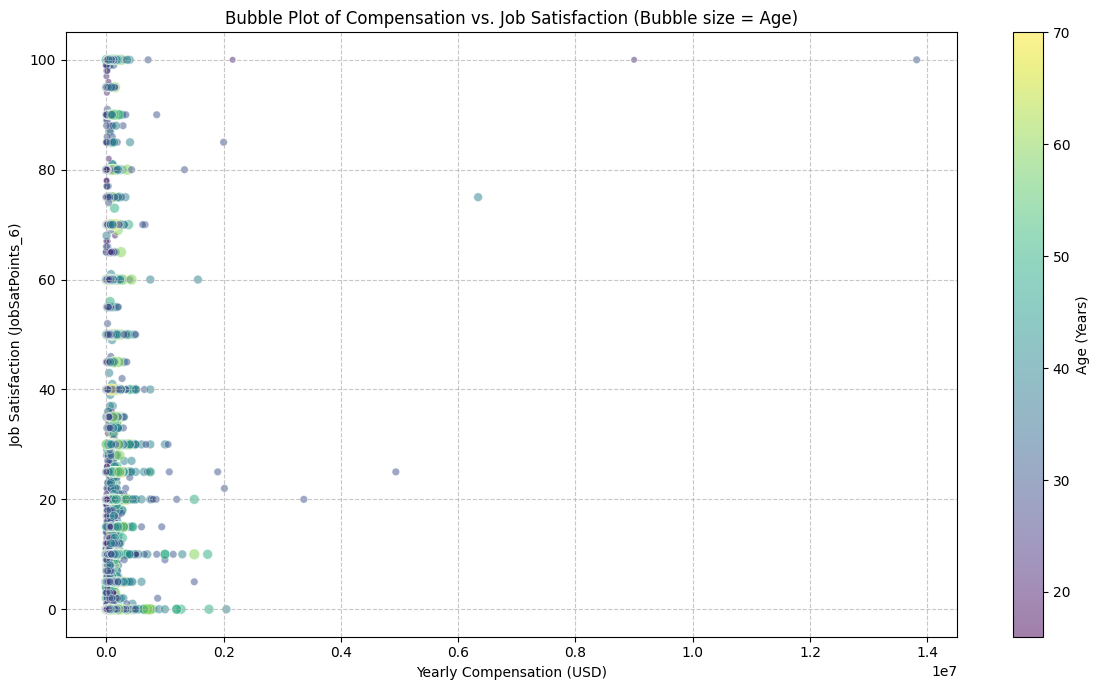

In [8]:
## Write your code here

# Clean data: drop rows with missing or invalid values
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age_numeric'])
df_clean = df_clean[(df_clean['ConvertedCompYearly'] > 0) & (df_clean['JobSatPoints_6'] >= 0)]


# Plot bubble chart
plt.figure(figsize=(12, 7))
scatter = plt.scatter(
    df_clean['ConvertedCompYearly'], 
    df_clean['JobSatPoints_6'], 
    s=df_clean['Age_numeric'],  # bubble size
    alpha=0.5,
    c=df_clean['Age_numeric'],  # color by age for extra insight
    cmap='viridis',
    edgecolors='w',
    linewidth=0.5
)

plt.colorbar(scatter, label='Age (Years)')
plt.title('Bubble Plot of Compensation vs. Job Satisfaction (Bubble size = Age)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



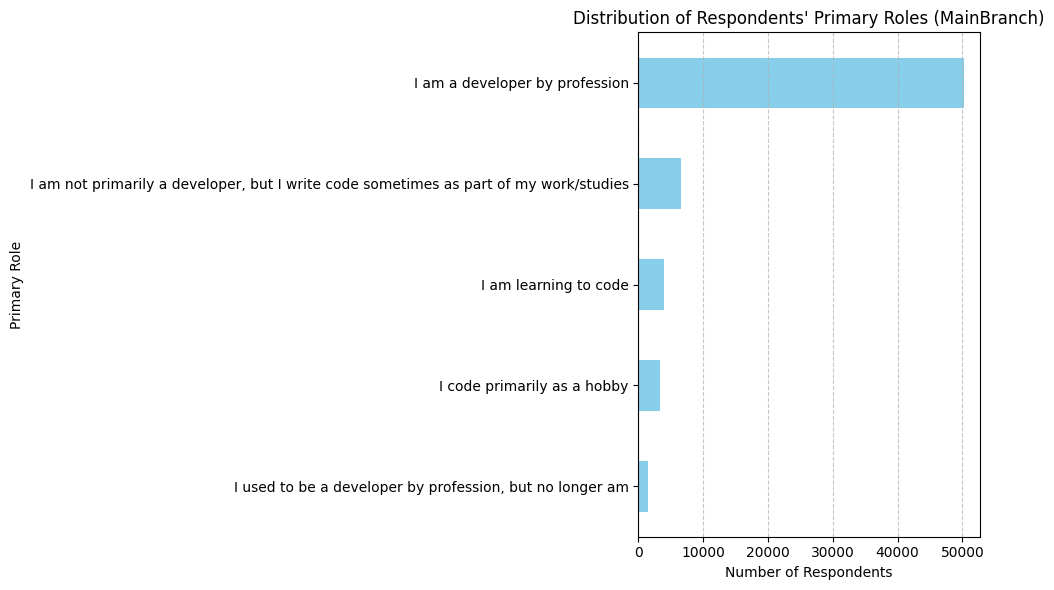

In [10]:
## Write your code here

# Count the frequency of each category in MainBranch
main_branch_counts = df['MainBranch'].value_counts()

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
main_branch_counts.plot(kind='barh', color='skyblue')
plt.title('Distribution of Respondents\' Primary Roles (MainBranch)')
plt.xlabel('Number of Respondents')
plt.ylabel('Primary Role')
plt.gca().invert_yaxis()  # Optional: To have the largest bar on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



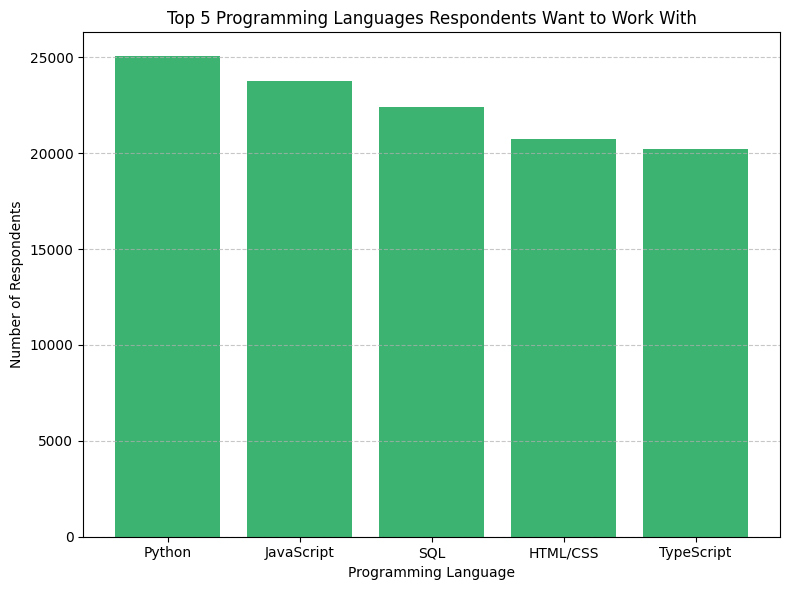

In [11]:
## Write your code here
from collections import Counter

# Drop missing entries in the language column
languages_series = df['LanguageWantToWorkWith'].dropna()

# Split the semicolon-separated strings and count each language
language_counts = Counter()
for response in languages_series:
    for lang in response.split(';'):
        language_counts[lang.strip()] += 1

# Get the top 5 most wanted languages
top_5_languages = dict(language_counts.most_common(5))

# Plot vertical bar chart
plt.figure(figsize=(8,6))
plt.bar(top_5_languages.keys(), top_5_languages.values(), color='mediumseagreen')
plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


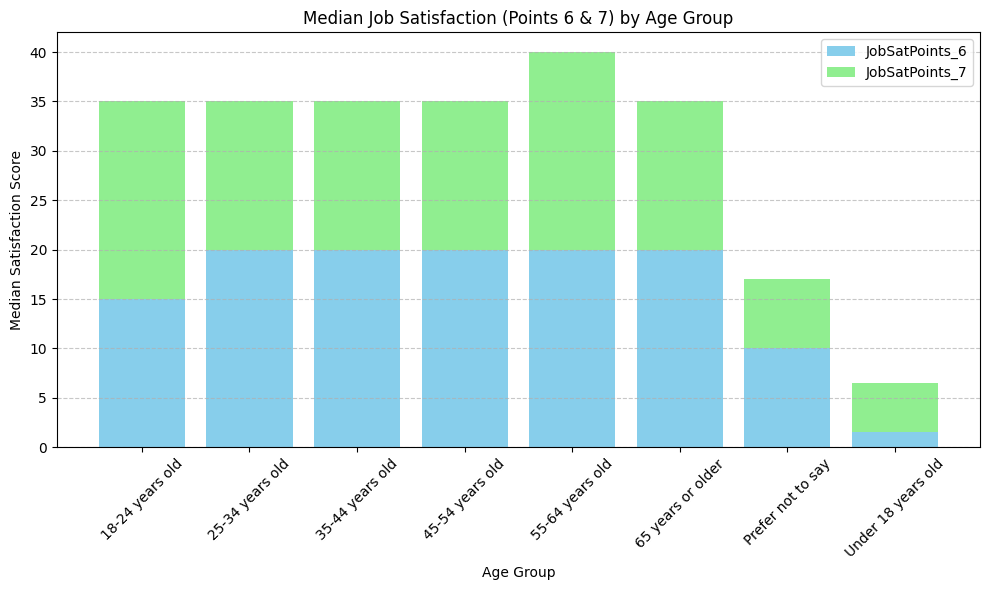

In [12]:
## Write your code here

# Keep only the relevant columns
df_subset = df[['Age', 'JobSatPoints_6', 'JobSatPoints_7']].dropna()

# Group by Age and calculate the median satisfaction scores
grouped = df_subset.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median().sort_index()

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped.index, grouped['JobSatPoints_6'], label='JobSatPoints_6', color='skyblue')
plt.bar(grouped.index, grouped['JobSatPoints_7'], bottom=grouped['JobSatPoints_6'], label='JobSatPoints_7', color='lightgreen')

plt.title('Median Job Satisfaction (Points 6 & 7) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Satisfaction Score')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



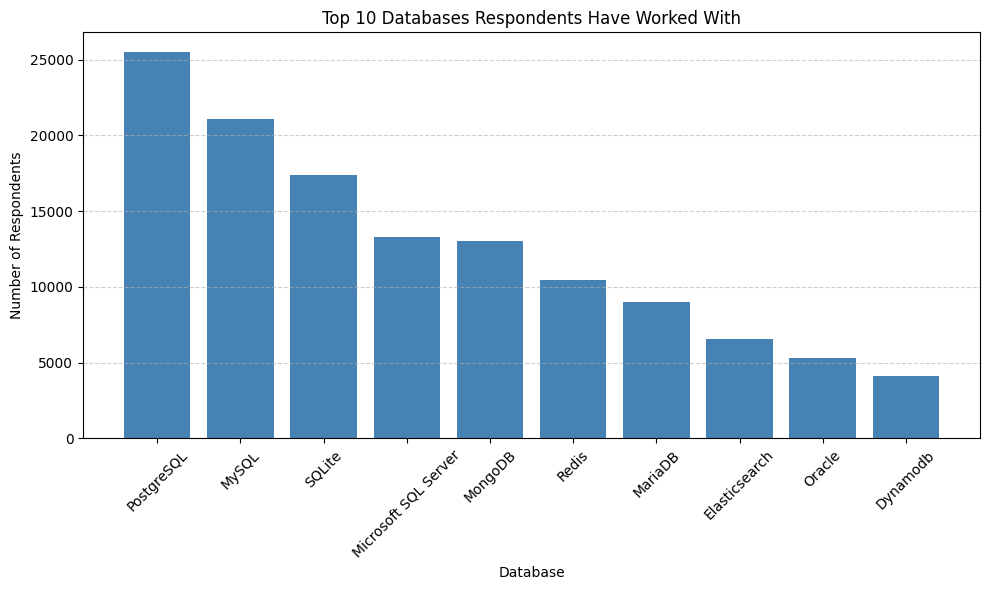

In [13]:
## Write your code here

# Drop NaN values in the database column
db_series = df['DatabaseHaveWorkedWith'].dropna()

# Count frequency of each individual database
db_counter = Counter()
for entry in db_series:
    for db in entry.split(';'):
        db_counter[db.strip()] += 1

# Get the most common databases
top_databases = db_counter.most_common(10)
labels, counts = zip(*top_databases)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='steelblue')
plt.title('Top 10 Databases Respondents Have Worked With')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



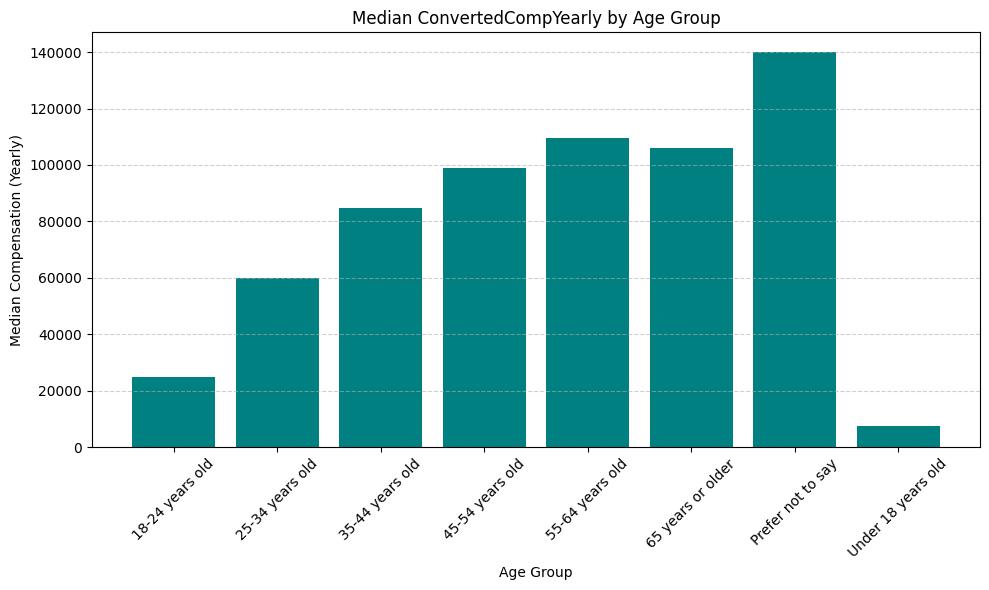

In [14]:
## Write your code here

# Keep relevant columns and drop NaNs
df_subset = df[['Age', 'ConvertedCompYearly']].dropna()

# Calculate median compensation per age group
median_comp = df_subset.groupby('Age')['ConvertedCompYearly'].median().sort_index()

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(median_comp.index, median_comp.values, color='teal')

plt.title('Median ConvertedCompYearly by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation (Yearly)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



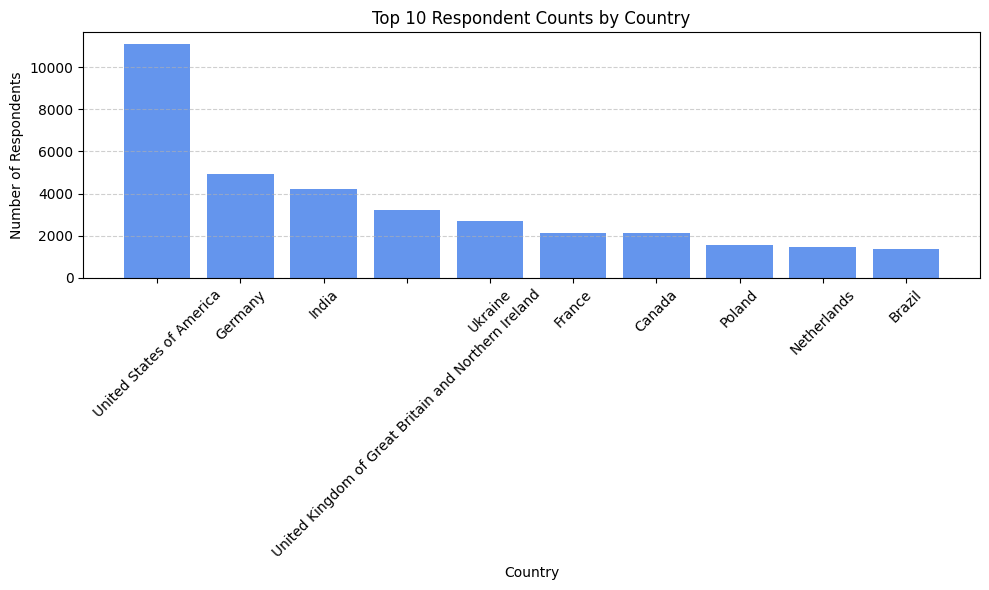

In [15]:
## Write your code here

# Count respondents per country
country_counts = df['Country'].value_counts().head(10)  # top 10 countries

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(country_counts.index, country_counts.values, color='cornflowerblue')
plt.title('Top 10 Respondent Counts by Country')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
